In [2]:
import statistics
import matplotlib.pyplot as plt

from scipy import interpolate

import numpy

plt.rc('text', usetex=True)

loc = "/home/phoebe/Dropbox/Stuff1819/proooject/diss/graphs"


In [3]:
pho = [0.52, 1.01, 1.56, 1.92, 2.48]
swi = [1.28, 5.18, 11.20, 19.73, 29.51]
gnu = [1.58, 2.52, 3.97, 4.81, 6.73]


x = [i for i in range(500000, 3000000, 500000)]

print(x)


pho1 = [0.48, 0.97, 1.54, 1.92, 2.43]
pho2 = [0.49, 0.97, 1.50, 1.91, 2.35] 
pho3 = [0.56, 0.98, 1.43, 1.91, 2.48] 
pho4 = [0.55, 0.95, 1.38, 1.95, 2.50] 
pho5 = [0.50, 0.98, 1.42, 2.07, 2.41]

test = statistics.stdev([0.48,0.49,0.56,0.55,0.50])

print(0.10940749517286291 / test)

swi1 = [1.23, 4.90, 11.28, 19.25, 29.31]
swi2 = [1.24, 4.85, 10.66, 18.69, 34.02]
swi3 = [1.23, 4.89, 10.74, 18.95, 29.38]
swi4 = [1.32, 5.01, 10.71, 19.28, 29.66]
swi5 = [1.31, 4.93, 11.07, 19.49, 31.30]

gnu1 = [1.31, 2.47, 3.94, 4.90, 5.97] 
gnu2 = [1.33, 2.52, 3.66, 4.85, 6.48] 
gnu3 = [1.86, 3.66, 4.18, 5.76, 6.67] 
gnu4 = [1.65, 3.17, 4.15, 5.42, 6.65] 
gnu5 = [1.78, 3.10, 4.35, 5.65, 6.68]


[500000, 1000000, 1500000, 2000000, 2500000]
3.0


In [4]:
pho_mean = [0.516, 0.97, 1.454, 1.952, 2.434]
pho_stdev = [0.10940749517286291, 0.036742346141747706, 0.19395875850293554, 0.20391174561559705, 0.17824140933015523]
swi_mean = [1.266, 4.9159999999999995, 10.892, 19.132, 30.734]
swi_stdev = [0.13516656391282583, 0.17949930361981914, 0.8109438944834582, 0.93972336354908, 6.0248336076608835]
gnu_mean = [1.586, 2.984, 4.056, 5.316, 6.49]
gnu_stdev = [0.7626729312097027, 1.4883447181348815, 0.7950283013830384, 1.263673217251992, 0.9057317483670319]


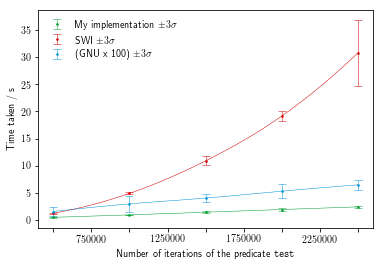

In [6]:
fig, ax = plt.subplots()

def addline(mean,stdev,name,color): 
    
    f = interpolate.interp1d(x,mean,kind='quadratic')
    
    up = 50000 
    xnew = numpy.arange(500000, 2500001, up)
#     print(xnew)
    ynew = f(xnew)
    
    ax.plot(xnew,ynew,linewidth=0.5,color=color)
    
    ax.errorbar(x,mean,yerr=stdev,label=name, 
                fmt='.', 
                capsize=4,
                markersize=4,
                markeredgewidth=0.5,
                capthick=0.5,
                linestyle='None',linewidth=0.5,color=color)

addline(pho_mean,pho_stdev,r'My implementation $\pm 3 \sigma$','#00a030')
addline(swi_mean,swi_stdev,r'SWI $\pm 3 \sigma$','#ce0000')
addline(gnu_mean,gnu_stdev,r'(GNU x 100) $\pm 3 \sigma$','#0091db')

ax.legend(frameon=False)

ax.set_xlabel(r'Number of iterations of the predicate \texttt{test}')
ax.set_ylabel('Time taken / s')


for label in ax.xaxis.get_ticklabels():
    label.set_visible(False)

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True)

fig.savefig((loc + "/scaling.png"),dpi=800)